## Import Dependencies

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Import Cleaned Dataset

In [2]:
data = pd.read_csv("data/sub_dataset.csv")
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Sweden,1990,male,75+ years,144,261500,55.07,Sweden1990,0.815,"258,154,283,909",32246,G.I. Generation
1,Sweden,1990,male,55-74 years,287,798100,35.96,Sweden1990,0.815,"258,154,283,909",32246,G.I. Generation
2,Sweden,1990,male,35-54 years,340,1174000,28.96,Sweden1990,0.815,"258,154,283,909",32246,Silent
3,Sweden,1990,male,25-34 years,157,606600,25.88,Sweden1990,0.815,"258,154,283,909",32246,Boomers
4,Sweden,1990,female,55-74 years,138,883800,15.61,Sweden1990,0.815,"258,154,283,909",32246,G.I. Generation


## Analyse Year Factor

In [3]:
# Group by Year

groupby_yr=data.groupby("year")
year_sum = groupby_yr["suicides_no"].sum()
year_sum.head()

year
1990    161838
1991    162310
1992    170801
1993    183064
1994    189759
Name: suicides_no, dtype: int64

In [4]:
# Total suicides number and suicides number by Gender Over 1990-2014

male = data.loc[(data["sex"] == "male")]
female = data.loc[(data["sex"] == "female")]

male_sum_yr = male.groupby(['year'])['suicides_no'].sum()
female_sum_yr = female.groupby(['year'])['suicides_no'].sum()

total_population=data.groupby(['year'])['population'].sum()
male_population=male.groupby(['year'])['population'].sum()
female_population=female.groupby(['year'])['population'].sum()

total_rate=year_sum/total_population
male_rate=male_sum_yr/male_population
female_rate=female_sum_yr/female_population

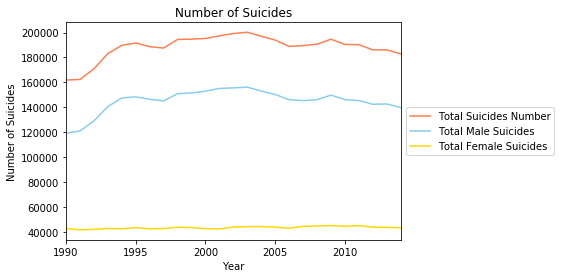

In [5]:
# Plot Number of Suicides by Sex

total_suicides_no = year_sum.plot(kind='line', color="coral",label="Total Suicides Number")
male_sum_yr_plot = male_sum_yr.plot(kind='line', color="skyblue", label="Total Male Suicides")
female_sum_yr_plot = female_sum_yr.plot(kind='line', color="gold", label='Total Female Suicides')


total_suicides_no.set_xlabel("Year")
total_suicides_no.set_ylabel("Number of Suicides")
plt.title("Number of Suicides")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("Images/num_suicides.jpg",bbox_inches = "tight")
plt.show()

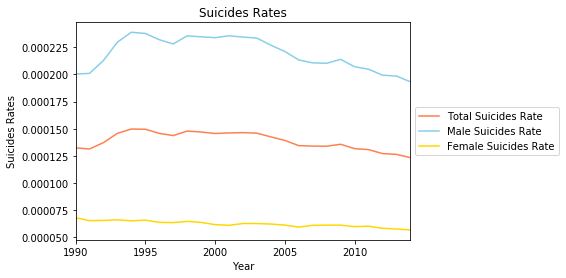

In [6]:
# Plot Suicide Rates by Sex 

total_rate_plot = total_rate.plot(kind='line', color="coral",label="Total Suicides Rate")
male_rate_plot = male_rate.plot(kind='line', color="skyblue", label="Male Suicides Rate")
female_rate_plot = female_rate.plot(kind='line', color="gold", label='Female Suicides Rate')


total_rate_plot.set_xlabel("Year")
total_rate_plot.set_ylabel("Suicides Rates")
plt.title("Suicides Rates")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("Images/rate_suicides.jpg",bbox_inches = "tight")
plt.show()

In [7]:
# Suicides Rates VS Country Over 1990-2014

country_year=data.groupby(['year','country'])['suicides_no'].sum()
country_population=data.groupby(['year','country'])['population'].sum()

country_rate=country_year/country_population

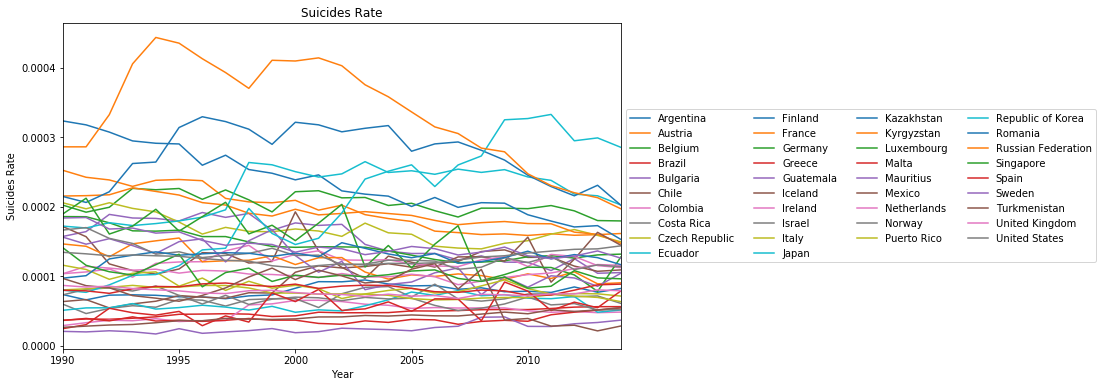

In [8]:
# Plot Suicide Rates By Country

country_rate_plot= country_rate.unstack().plot(kind='line', figsize = (10,6))

country_rate_plot.set_xlabel("Year")
country_rate_plot.set_ylabel("Suicides Rate")
plt.title("Suicides Rate")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=4)
plt.savefig("Images/country_year.jpg",bbox_inches = "tight")

plt.show()

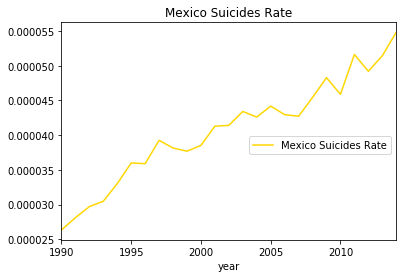

In [9]:
# Specifically look at Suicide Rates in Mexico

mexico = data.loc[(data["country"] == "Mexico")]
mex_suicides = mexico.groupby(['year'])['suicides_no'].sum()
mex_population=mexico.groupby(['year'])['population'].sum()

mex_rate=mex_suicides/mex_population

mex_plot = mex_rate.plot(kind='line', color="gold", label='Mexico Suicides Rate')


total_suicides_no.set_xlabel("Year")
total_suicides_no.set_ylabel("Suicides Rate")
plt.title("Mexico Suicides Rate")

plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.savefig("Images/mex_suicides.jpg",bbox_inches='tight')

plt.show()

In [10]:
# Suicide Rates by Age Over 1990-2014

age_year=data.groupby(['year','age'])['suicides_no'].sum()
age_population=data.groupby(['year','age'])['population'].sum()
age_rate=age_year/age_population

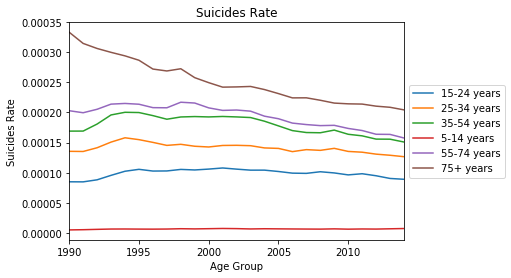

In [11]:
# Plot Suicide Rates by Age

age_rate_plot= age_rate.unstack().plot(kind='line')

age_rate_plot.set_xlabel("Age Group")
age_rate_plot.set_ylabel("Suicides Rate")
plt.title("Suicides Rate")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=1)
plt.savefig("Images/age_year.jpg",bbox_inches = "tight")

plt.show()

## Analyse Age/Sex Factor

In [12]:
# Group by Age,Sex

sub_data = data.loc[:,["country","year","sex","age","suicides_no","population","suicides/100k pop"]]
groupby_age_sex = sub_data.groupby(["age","sex"])
groupby_age_sex.count()

country  year  suicides_no  population  suicides/100k pop
age         sex                                                              
15-24 years female      950   950          950         950                950
            male        950   950          950         950                950
25-34 years female      950   950          950         950                950
            male        950   950          950         950                950
35-54 years female      950   950          950         950                950
            male        950   950          950         950                950
5-14 years  female      950   950          950         950                950
            male        950   950          950         950                950
55-74 years female      950   950          950         950                950
            male        950   950          950         950                950
75+ years   female      950   950          950         950                950
            male        950   950          950         950                950

In [13]:
# Create New DataFrame
suicide_sum = pd.DataFrame({"suicides_sum": groupby_age_sex["suicides_no"].sum()})
# Unstack the DataFrame to create bar chart
suicide_sum = suicide_sum.unstack()
suicide_sum

suicides_sum         
sex               female     male
age                              
15-24 years       113466   435073
25-34 years       143549   631340
35-54 years       355754  1368261
5-14 years         11519    24501
55-74 years       297580   859581
75+ years         160053   306630

In [14]:
# Create an index column to sort age group

ind = [2, 3, 4, 1, 5, 6]
suicide_sum["index_col"] = ind
suicide_sum = suicide_sum.sort_values("index_col")['suicides_sum']
suicide_sum

sex,female,male
age,,
5-14 years,11519,24501
15-24 years,113466,435073
25-34 years,143549,631340
35-54 years,355754,1368261
55-74 years,297580,859581
75+ years,160053,306630


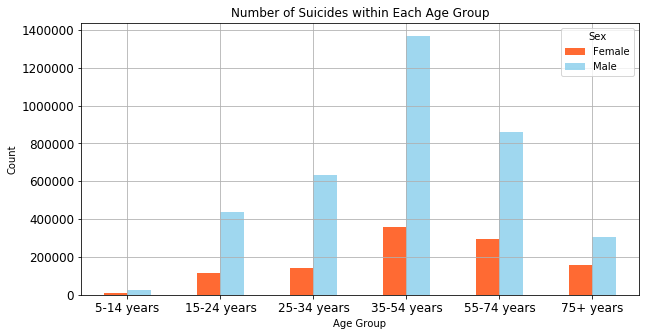

In [15]:
# Plot Number of Suicides by Age Group

suicide_sum.plot(kind="bar", rot = 0, figsize = (10,5), 
                 color = ["orangered","skyblue"], fontsize = 12, alpha = 0.8)

plt.legend(["Female","Male"],title="Sex")
plt.title("Number of Suicides within Each Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.grid()
plt.savefig("Images/age_group_counts.png", bbox_inches = "tight")

plt.show()

In [16]:
# Suicide rate for Each Age Group

suicide_rate = pd.DataFrame({"suicide_rates_%": groupby_age_sex["suicides_no"].sum()/groupby_age_sex["population"].sum()*100})
suicide_rate = suicide_rate.unstack()

In [17]:
# Sort by Age Group

ind = [2, 3, 4, 1, 5, 6]
suicide_rate["index_col"] = ind
suicide_rate = suicide_rate.sort_values("index_col")["suicide_rates_%"]
suicide_rate

sex,female,male
age,,
5-14 years,0.000442,0.000900
15-24 years,0.004179,0.015454
25-34 years,0.005257,0.022867
35-54 years,0.007282,0.028629
55-74 years,0.009159,0.030884
75+ years,0.013114,0.044814


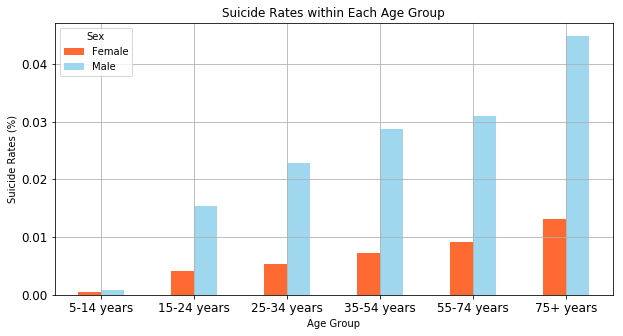

In [18]:
# Plot Suicides Rates by Age Group

suicide_rate.plot(kind="bar", rot = 0, figsize = (10,5), 
                 color = ["orangered","skyblue"], fontsize = 12, alpha = 0.8)

plt.legend(["Female","Male"],title="Sex")
plt.title("Suicide Rates within Each Age Group")
plt.xlabel("Age Group")
plt.ylabel("Suicide Rates (%)")
plt.grid()
plt.savefig("Images/age_group_rates.png", bbox_inches = "tight")

plt.show()

In [19]:
# Number of Suicides by Gender

sex_group = sub_data.groupby(["sex"])
sum_by_sex = pd.DataFrame(sex_group["suicides_no"].sum())
sum_by_sex

,suicides_no
sex,
female,1081921
male,3625386


<Figure size 432x288 with 0 Axes>

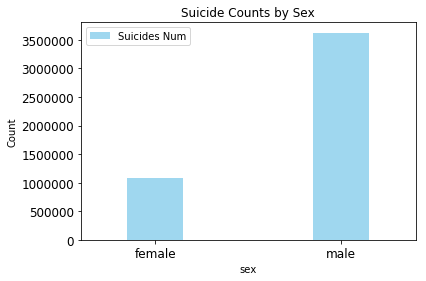

In [20]:
# Plot Number of Suicides by Gender

plt.figure()

sum_by_sex.plot(kind = "bar", color = "skyblue", width = 0.3, alpha = 0.8, rot = 0, fontsize = 12)
plt.title("Suicide Counts by Sex")
plt.ylabel("Count")
plt.legend(["Suicides Num"],loc="best")
plt.savefig("Images/sex_group_counts.png", bbox_inches = "tight")
plt.show()

In [21]:
# Suicide Rates by Gender 

rate_by_sex = pd.DataFrame({"suicide_rates_%": sex_group["suicides_no"].sum()/sex_group["population"].sum()*100})
rate_by_sex

,suicide_rates_%
sex,
female,0.006216
male,0.021910


<Figure size 432x288 with 0 Axes>

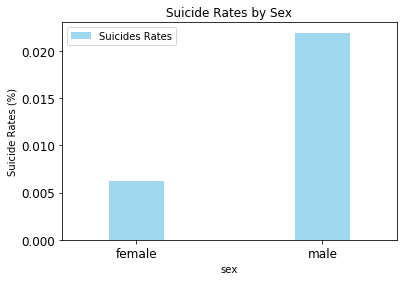

In [22]:
# Plot Suicide Rates by Gender

plt.figure()

rate_by_sex.plot(kind = "bar", color = "skyblue", width = 0.3, alpha = 0.8, rot = 0, fontsize = 12)
plt.title("Suicide Rates by Sex")
plt.ylabel("Suicide Rates (%)")
plt.legend(["Suicides Rates"],loc="best")
plt.savefig("Images/sex_group_rates.png", bbox_inches = "tight")
plt.show()

In [23]:
# Perform two sample T-Test on female and male data
import scipy.stats as stats

In [24]:
df_female = sub_data.loc[sub_data["sex"] == "female", :]
df_male = sub_data.loc[sub_data["sex"] == "male", :]

stats.ttest_ind(df_female["suicides_no"], df_male["suicides_no"], equal_var=False)

Ttest_indResult(statistic=-18.76678543083263, pvalue=1.457542644160781e-76)

In [25]:
stats.ttest_ind(df_female["suicides/100k pop"], df_male["suicides/100k pop"], equal_var=False)

Ttest_indResult(statistic=-51.72344966551411, pvalue=0.0)

In [26]:
# Male to Female Suicides Ratio

suicide_sum["male_to_female_ratio"] = suicide_sum["male"]//suicide_sum["female"]
suicide_sum

sex,female,male,male_to_female_ratio
age,,,
5-14 years,11519,24501,2
15-24 years,113466,435073,3
25-34 years,143549,631340,4
35-54 years,355754,1368261,3
55-74 years,297580,859581,2
75+ years,160053,306630,1
